<a href="https://colab.research.google.com/github/abuebayyeh/imperial_eee_machine_learning_course/blob/main/02_ML_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


---


Regression, a fundamental supervised learning technique, plays a pivotal role in predicting a dependent variable by establishing connections with one or more independent variables. This concept is particularly significant in situations where insights from various data sources collectively contribute to making accurate predictions.

For instance, let's consider the diabetes dataset$^\dagger$, where our objective is to forecast a patient's disease progression. This prediction might dependent on multiple factors, including age, body mass index (BMI), blood pressure, and serum insulin levels. These attributes, serving as independent variables, interplay to influence the dependent variable, diabetes disease progression in this scenario.

Linear regression emerges as a specific approach within regression. It assumes a linear relationship between the independent and dependent variables. In the context of the diabetes dataset, linear regression aims to model the connection between various patient attributes (independent variables) and the progression of diabetes (dependent variable) using a linear equation.

Mathematically, the linear regression equation takes the form:

$$
y = w_0x_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n = \sum_{i=0}^{n}w_ix_i = \mathbf{W}^T\mathbf{X}
$$

Here, $y$ represents the dependent variable (diabetes progression), $x_1, x_2, \ldots, x_n$ denote the independent variables (age, BMI, blood pressure, etc.), and $w_0, w_1, w_2, \ldots, w_n$ are the coefficients that determine the impact of each independent variable on the dependent variable. Hence, $x_0=1$ to account the bias term.

Linear regression strives to find the optimal values for these coefficients that minimize the difference between the predicted values and the actual observed values. This process involves fitting a line that best captures the linear relationship between the variables, allowing us to make accurate predictions based on the learned model as shown in the figure below.

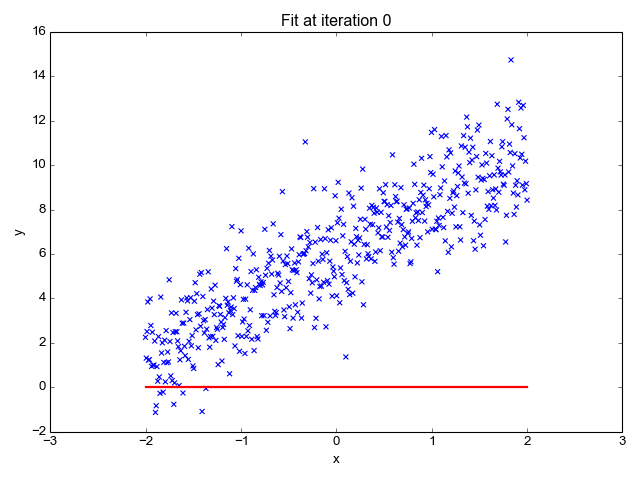

[[Image Source]](https://towardsdatascience.com/linear-regression-the-easier-way-6f941aa471ea)

We introduce the concept of Mean Squared Error (MSE). The MSE metric quantifies the error of our predictions by measuring the average squared difference between predicted and actual values. Mathematically, MSE is calculated across all patients:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In this equation, $y_i$ represents the actual diabetes progression value for the $i^{th}$ patient, and $\hat{y}_i$ signifies the predicted value from our regression model. Lower MSE values indicate a better model fit, where predictions closely align with actual outcomes.




> $\dagger$: More information on the diabetes dataset will be revealed as we go throughout the tutorial.



# Diabetes Dataset


The diabetes dataset, available in the `sklearn.datasets` module, is a commonly used dataset in machine learning. It comprises ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) for 442 diabetes patients. The target variable is a quantitative measure of disease progression one year after baseline.

The dataset is often employed to explore regression techniques, especially linear regression. Its attributes provide insights into various factors that may influence the progression of diabetes, making it a valuable resource for understanding the relationship between patient attributes and disease outcomes.

To load the diabetes dataset in your Colab notebook, you can use the following code:

```python
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Access data and target variables
X = diabetes.data
y = diabetes.target

```


Throughout this tutorial, we will utilise the diabetes dataset to address a linear regression problem employing both the gradient descent and closed-form solution methods.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Print data description
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
# print feature names used in the data
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

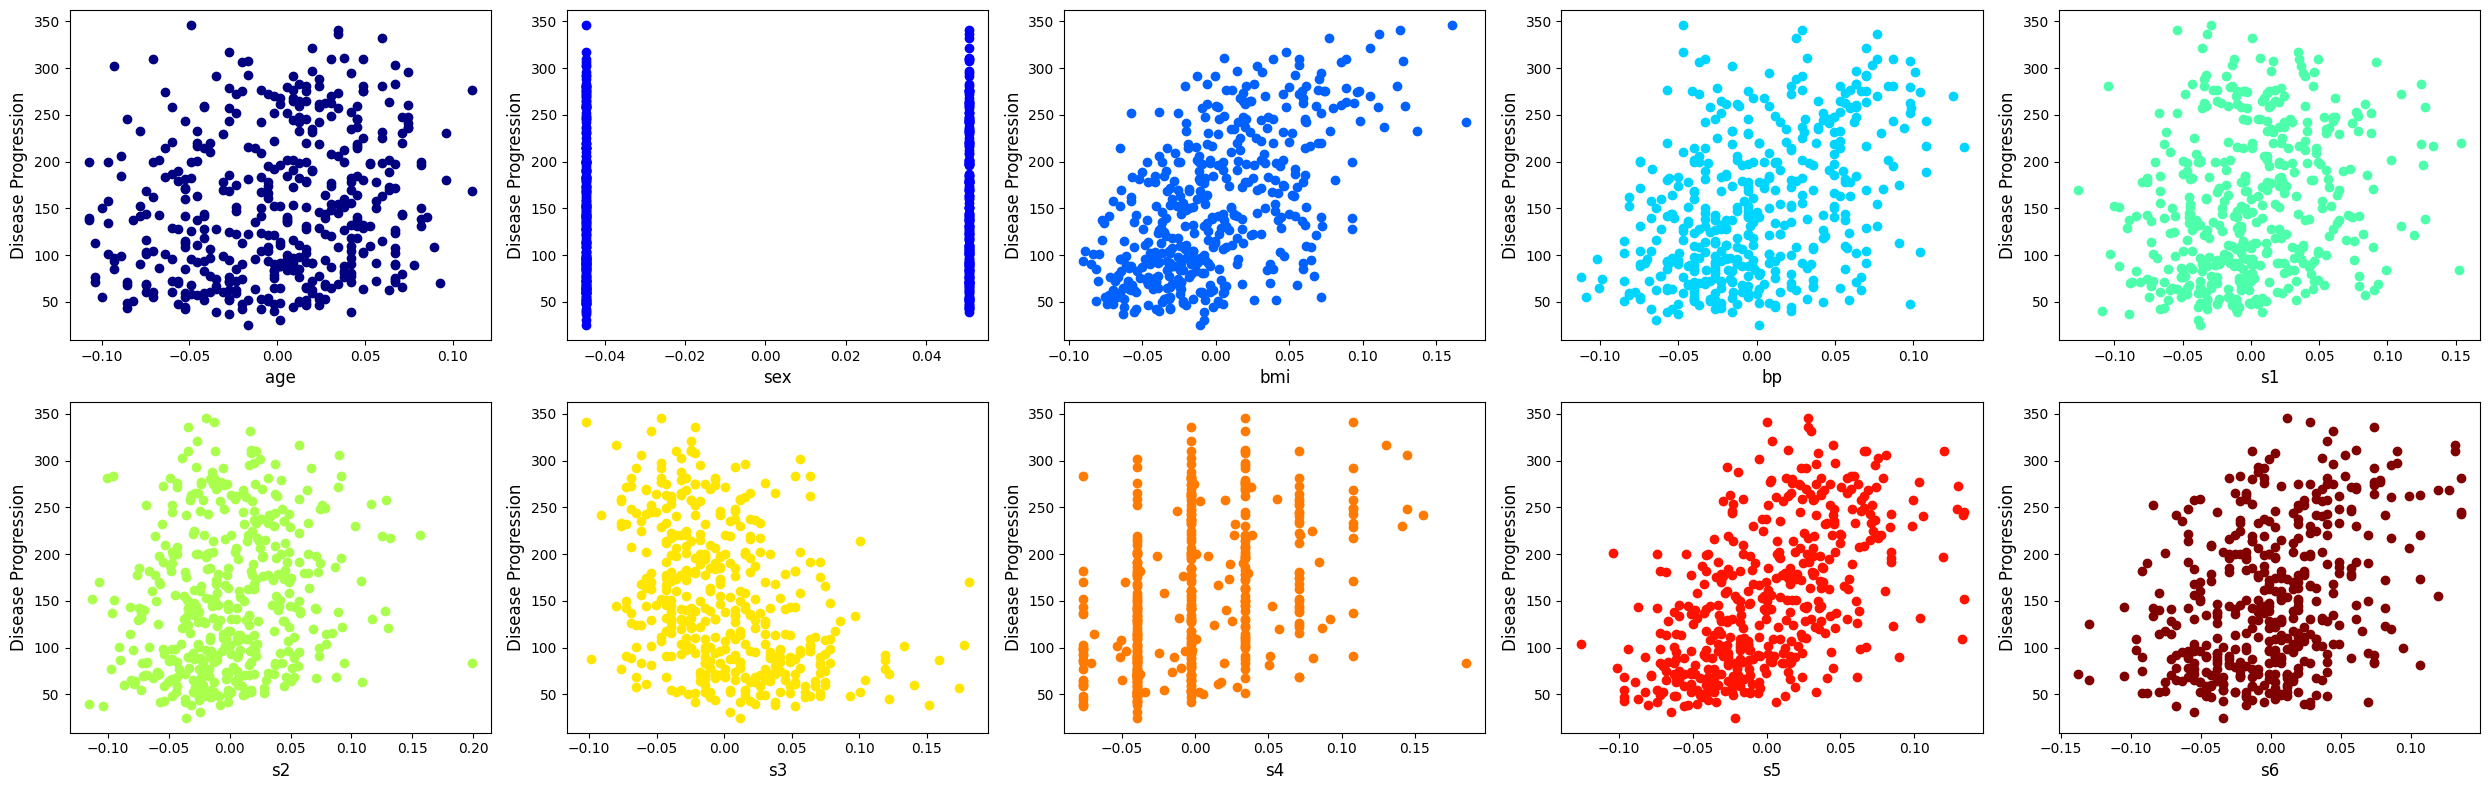

In [4]:
# Create a DataFrame to store the data and target
diabetes_data = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
diabetes_data["DP"] = diabetes['target']

# Set the size of each individual plot
plot_width = 5
plot_height = 4

# Calculate the number of rows and columns for the grid layout
num_features = len(diabetes.feature_names)
num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(plot_width * num_cols, plot_height * num_rows))

# Flatten the axes array to iterate over all the subplots
axes = axes.flatten()

# Define a colormap for assigning different colors to each feature plot
colors = plt.cm.jet(np.linspace(0, 1, num_features))

# Plot each feature against the target variable in separate subplots
for index, feature_name in enumerate(diabetes.feature_names):
    axes[index].scatter(diabetes.data[:, index], diabetes.target, color=colors[index])
    axes[index].set_ylabel('Disease Progression', size=12)
    axes[index].set_xlabel(feature_name, size=12)

# Hide any remaining empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Gradient Descent


For linear regression, an alternate method known as Gradient Descent emerges as a powerful optimization technique. While the closed-form solution provides a direct way to compute optimal weights, Gradient Descent takes a different path, particularly suitable for large datasets and scenarios where matrix inverses may be costly.

**Understanding Gradient Descent**

At the core of Gradient Descent lies the idea of iteratively adjusting the model's weights to minimize the Mean Squared Error (MSE) and thus achieve a better fit to the data. MSE quantifies the average squared difference between the predicted and actual values. To achieve a lower MSE, we seek to fine-tune the weights that govern the linear relationship between the independent variables and the dependent variable.

**The Iterative Minimization Process**

Gradient Descent follows a systematic iterative process to update the weights. The goal is to find the direction in which the weights should be adjusted to reduce the error. The direction is determined by the gradient of the MSE with respect to the weights. This gradient points towards the steepest ascent of the error, so we move in the opposite direction to minimize it.

**Mathematical Framework**

Let's focus into the mathematical foundation of Gradient Descent. The process involves calculating the gradient of the MSE and updating the weights using the following formula:

$
w_j = w_j - \alpha \cdot \frac{\partial}{\partial w_j} \text{MSE}(w)
$

Here, $w_j$ represents the $j$th weight, and $\alpha$ is the learning rate, which determines the step size in each iteration. The partial derivative with respect to $w_j$ indicates how much the MSE changes as we vary the $j$th weight.

**Choosing the Learning Rate**

The choice of the learning rate is crucial. A larger learning rate may cause overshooting, while a smaller rate might lead to slow convergence. It's a balancing act to find an appropriate learning rate that allows for a steady convergence towards the minimum MSE.

**Convergence**

Gradient Descent continues iteratively, adjusting the weights until convergence is achieved. Convergence is reached when the change in MSE becomes negligible or when a specified number of iterations are completed. This can be illustrated in the figure below

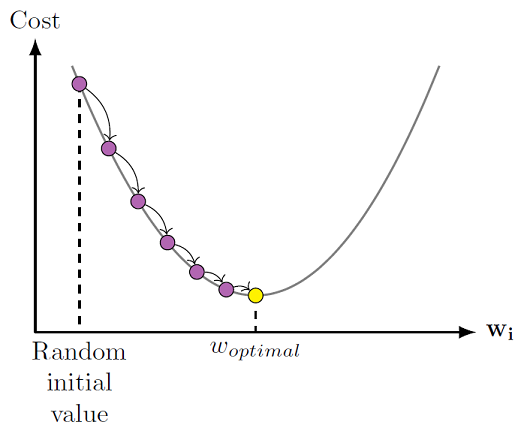

**Advantages and Considerations**

Gradient Descent is particularly valuable for large datasets where the closed-form solution becomes computationally expensive. Additionally, it can handle cases where the matrix is not invertible, such as when multicollinearity exists among independent variables.

Gradient Descent offers an iterative optimization approach that dynamically updates weights to minimize MSE and enhance the linear regression model's fit. This method is flexible, efficient, and well-suited for complex datasets and scenarios where traditional methods may not be feasible.

In the following cells, we will implement the gradient descent algorithm to determine the optimal weight configuration for a chosen features of the diabetes dataset.


In [5]:
# function to perform the prediction by multiplying the inputs with weights
def predict_dp(X,W):
    return np.dot(X,W)

In [6]:
# function to calculate the cost (here we use MSE)
def cost(X,W,Y):
    prediction = predict_dp(X,W)
    return ((Y - prediction)**2).mean()

In [7]:
# function to plot the predicted line vs real data
def plot_line(X,W,Y):
    """Plot a line from slope and intercept"""
    y_vals = predict_dp(X,W)
    plt.figure(figsize=(5, 4))
    plt.xlabel('Age')
    plt.ylabel('Disease Progression (DP)')
    plt.scatter(X[:,1],Y, color='red', label='Actual')
    plt.plot(X[:,1], y_vals, color='black', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()

In [8]:
# function to plot cost variations as the algorithm iterate
def plot_cost(cost):
    plt.figure(figsize=(5, 4))
    plt.plot(range(1, len(cost) + 1), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

In [9]:
# function that applies GD and fit the algorithm
def fit(n_iter,X,Y,lr):
    W0 = []
    W1 = []
    costs = []
    # Incorporate the bias term
    X = np.column_stack((np.ones(len(X)),X))
    #N = len(diabetes['target'])
    W = np.zeros(2)
    c = 0
    for i in range(n_iter):
        pred = predict_dp(X,W)
        W[0] += lr *(Y - pred).mean()
        W[1] += lr *((Y - pred)* X[:,1]).mean()
        W = np.array([W[0],W[1]])
        J = cost(X,W,Y)
        W0.append(W[0])
        W1.append(W[1])
        costs.append(J)
        c = i + 1
        if i%1000==0:
            print(f"Iteration: {i}, Cost = {J}, Weights = {W}")
            plot_line(X,W,Y)
    print(f"Iteration: {c}, Cost = {J}, Weights = {W}")
    plot_line(X,W,Y)
    plot_cost(costs)

Iteration: 0, Cost = 6160.479227680582, Weights = [136.92013575   0.6193773 ]


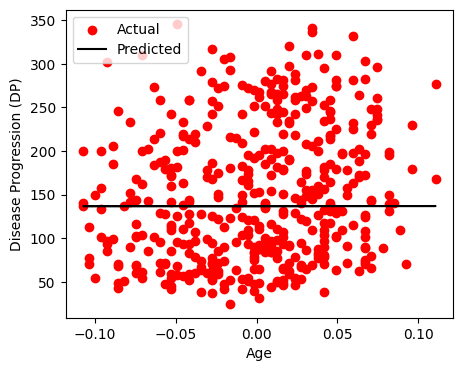

Iteration: 1000, Cost = 5724.084173552051, Weights = [152.13348416 264.64292904]


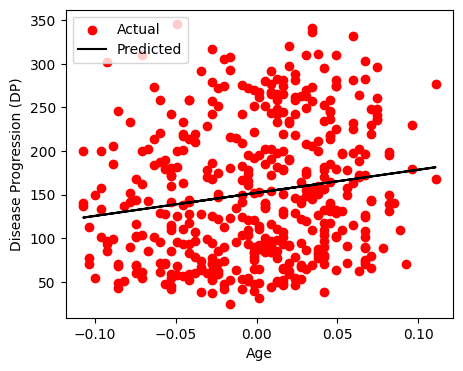

Iteration: 2000, Cost = 5720.6070282403925, Weights = [152.13348416 299.03284372]


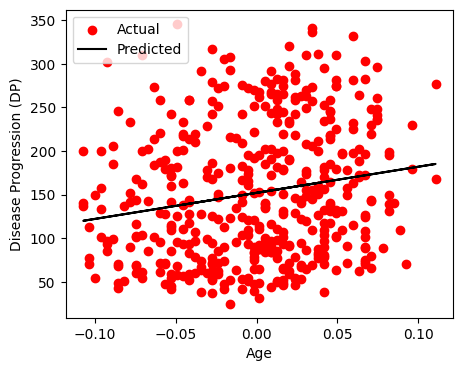

Iteration: 3000, Cost = 5720.548035346757, Weights = [152.13348416 303.51224044]


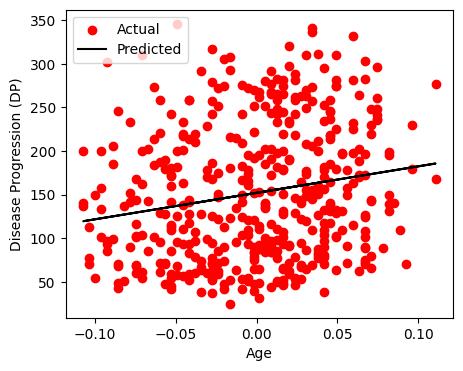

Iteration: 4000, Cost = 5720.547034479326, Weights = [152.13348416 304.09569624]


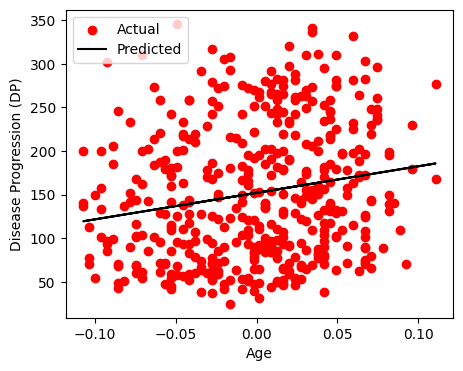

Iteration: 5000, Cost = 5720.547017498711, Weights = [152.13348416 304.17169323]


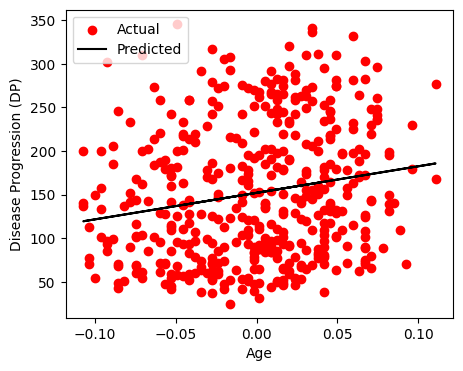

Iteration: 6000, Cost = 5720.54701721062, Weights = [152.13348416 304.18159208]


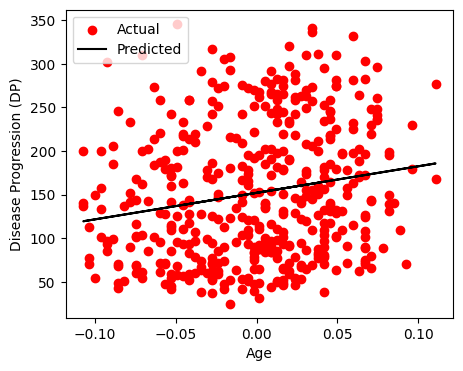

Iteration: 7000, Cost = 5720.547017205731, Weights = [152.13348416 304.18288143]


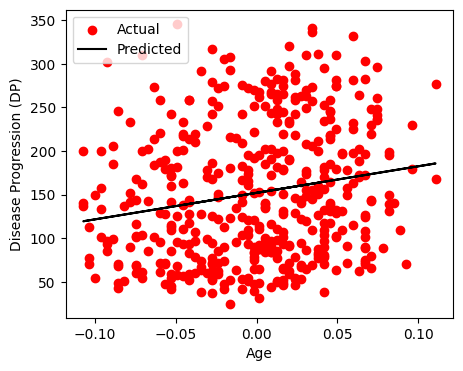

Iteration: 8000, Cost = 5720.547017205648, Weights = [152.13348416 304.18304938]


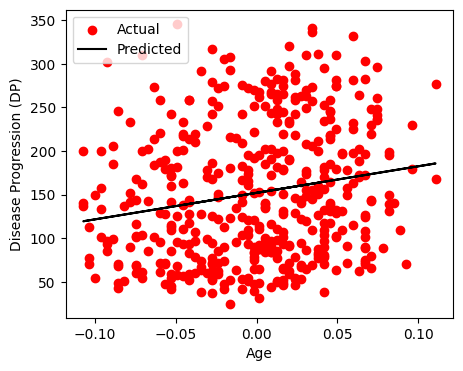

Iteration: 9000, Cost = 5720.5470172056475, Weights = [152.13348416 304.18307125]


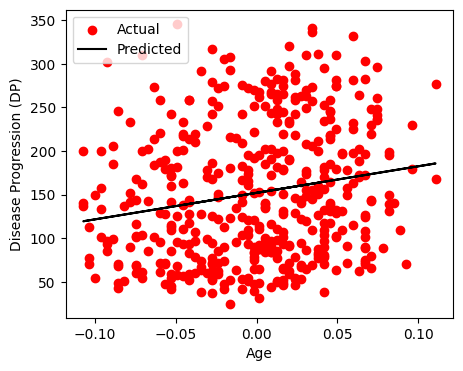

Iteration: 10000, Cost = 5720.547017205647, Weights = [152.13348416 304.1830741 ]


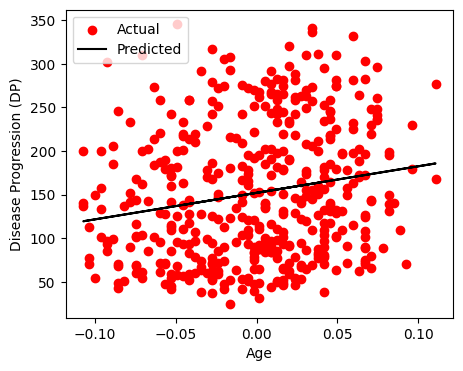

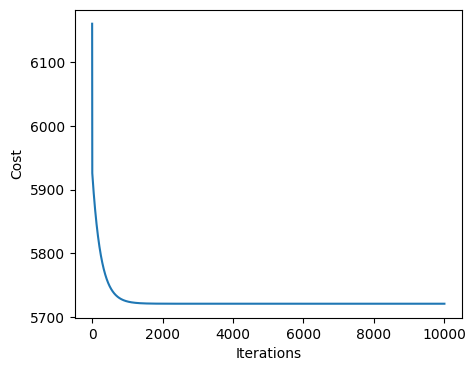

In [10]:
lr = 0.9
n_iter=10000
X = diabetes_data["age"]
Y = diabetes_data["DP"]
fit(n_iter,X,Y,lr)

## Task 1 [10 marks]

Update the Gradient Descent (GD) code to predict disease progression (DP) based on two different features: body mass index (BMI) and average blood pressure (BP). Follow the same procedure as before to determine the optimal weights for each case.

Execute the modified code to generate the following outcomes:

- Plot illustrating the actual data points and the predicted regression line for disease progression vs BMI according to the final weights obtained.
- Plot illustrating the actual data points and the predicted regression line for disease progression vs average blood pressure (BP) according to the final weights obtained.
- Display the final weights and cost (MSE) obtained after the optimisation process for both cases (keep the values to be used in the same table of tasks 2 and 3).

TASK 1: Gradient Descent for BMI
Iteration: 0, Cost = 6153.033958469029, Weights = [136.92013575   1.93323922]


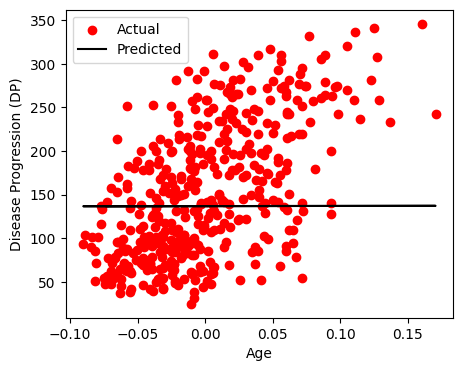

Iteration: 1000, Cost = 3924.9165542211103, Weights = [152.13348416 826.02008226]


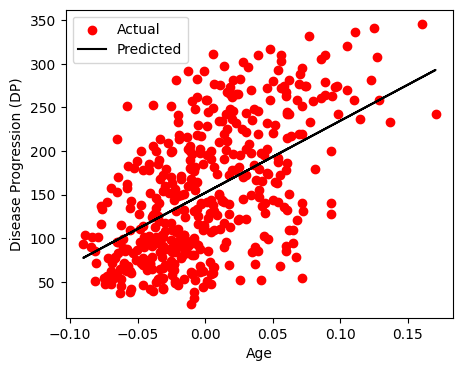

Iteration: 2000, Cost = 3891.041229785707, Weights = [152.13348416 933.36003748]


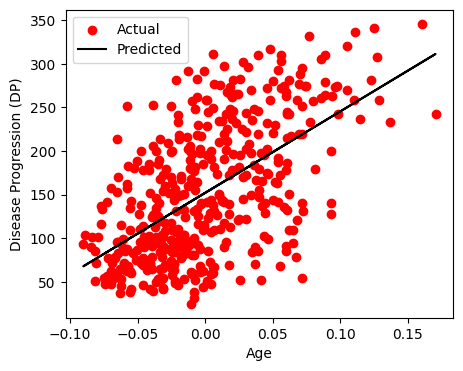

Iteration: 3000, Cost = 3890.466504477406, Weights = [152.13348416 947.34141103]


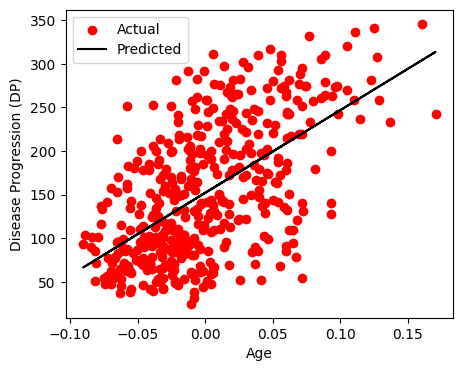

Iteration: 4000, Cost = 3890.4567537462904, Weights = [152.13348416 949.16252979]


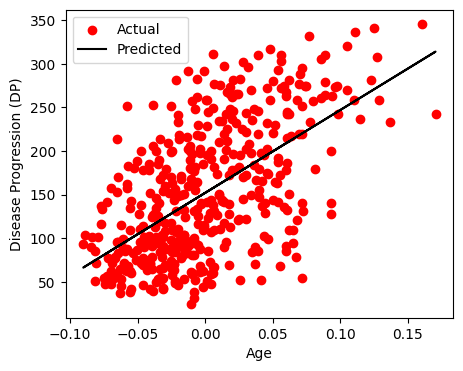

Iteration: 5000, Cost = 3890.456588316379, Weights = [152.13348416 949.39973635]


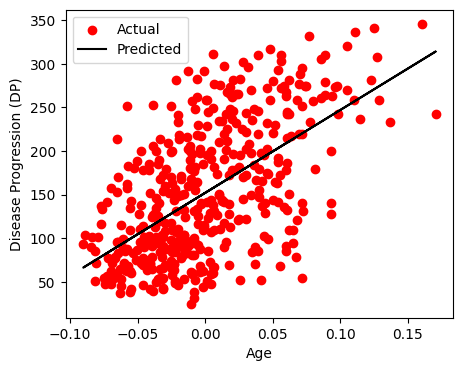

Iteration: 6000, Cost = 3890.4565855097117, Weights = [152.13348416 949.43063326]


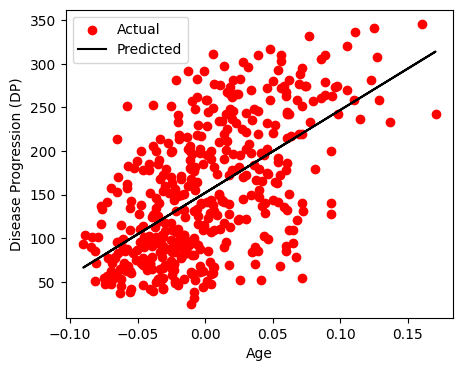

Iteration: 7000, Cost = 3890.4565854620946, Weights = [152.13348416 949.43465769]


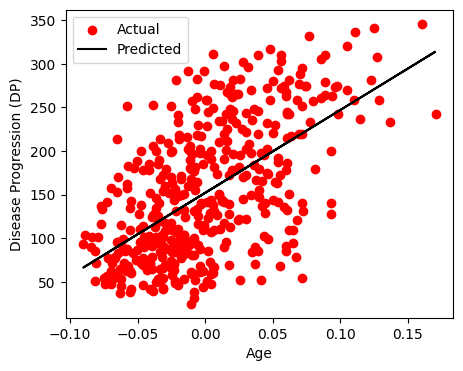

Iteration: 8000, Cost = 3890.4565854612865, Weights = [152.13348416 949.43518188]


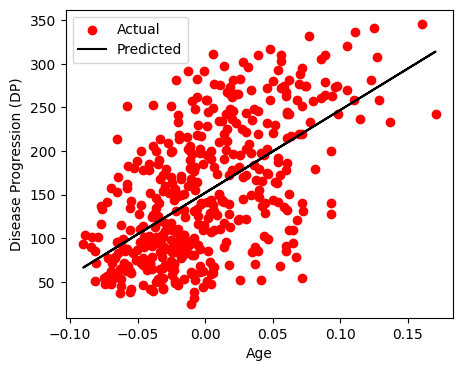

Iteration: 9000, Cost = 3890.456585461273, Weights = [152.13348416 949.43525016]


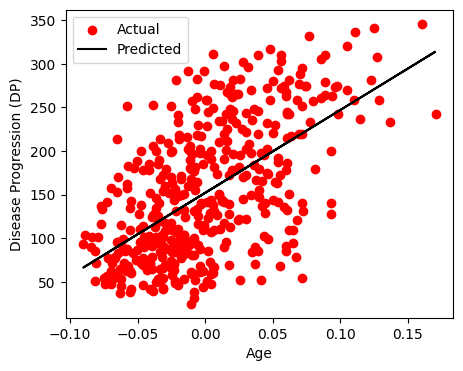

Iteration: 10000, Cost = 3890.456585461273, Weights = [152.13348416 949.43525905]


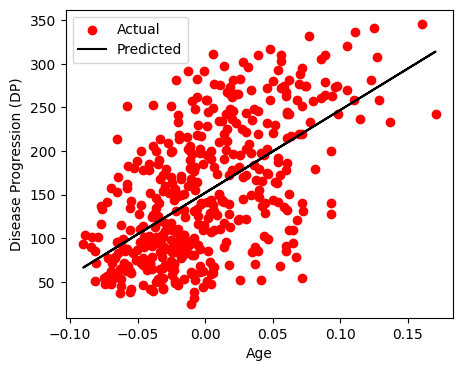

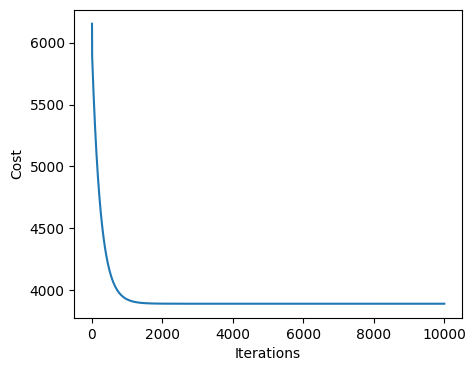

In [11]:
# Task 1 - BMI

print("=" * 60)
print("TASK 1: Gradient Descent for BMI")
print("=" * 60)

lr = 0.9
n_iter = 10000
X_bmi = diabetes_data["bmi"]
Y = diabetes_data["DP"]
fit(n_iter, X_bmi, Y, lr)


TASK 1: Gradient Descent for BP
Iteration: 0, Cost = 6156.628899189452, Weights = [136.92013575   1.4553494 ]


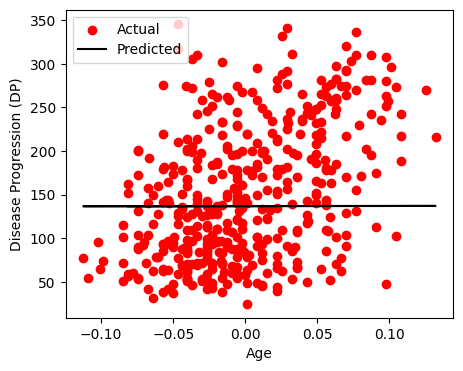

Iteration: 1000, Cost = 4793.642822381146, Weights = [152.13348416 621.83087203]


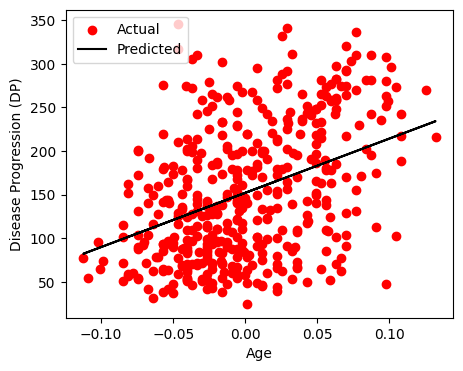

Iteration: 2000, Cost = 4774.44522803898, Weights = [152.13348416 702.6367742 ]


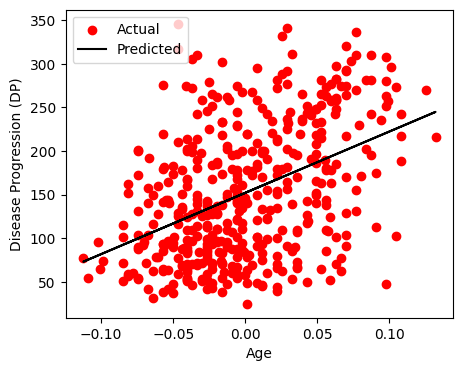

Iteration: 3000, Cost = 4774.119523606304, Weights = [152.13348416 713.16200221]


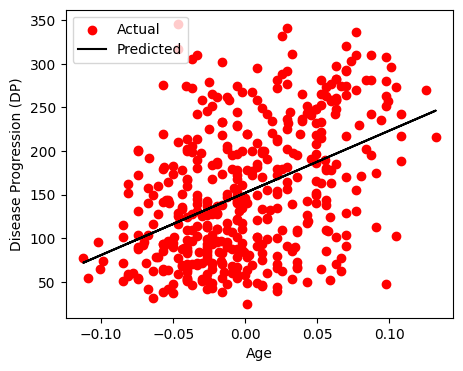

Iteration: 4000, Cost = 4774.113997738033, Weights = [152.13348416 714.53294693]


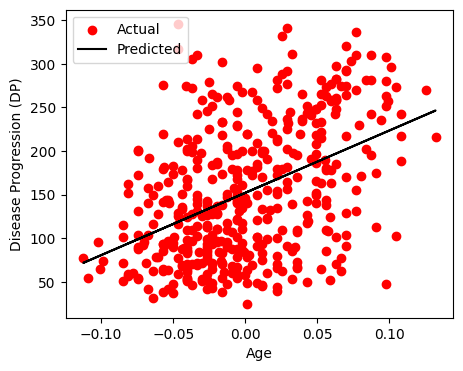

Iteration: 5000, Cost = 4774.113903986714, Weights = [152.13348416 714.71151688]


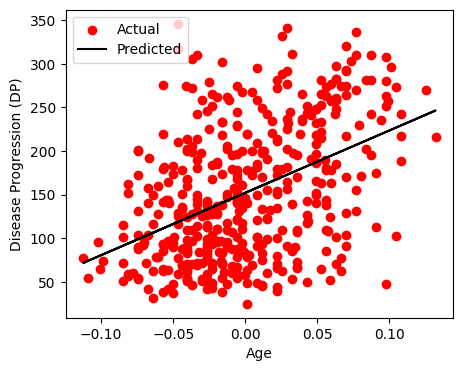

Iteration: 6000, Cost = 4774.113902396139, Weights = [152.13348416 714.73477618]


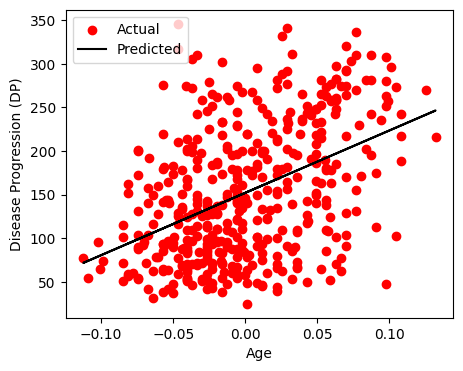

Iteration: 7000, Cost = 4774.113902369153, Weights = [152.13348416 714.73780578]


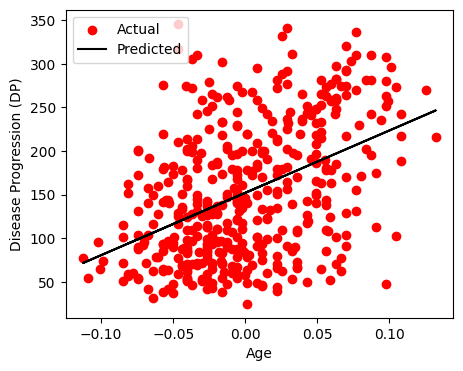

Iteration: 8000, Cost = 4774.113902368695, Weights = [152.13348416 714.7382004 ]


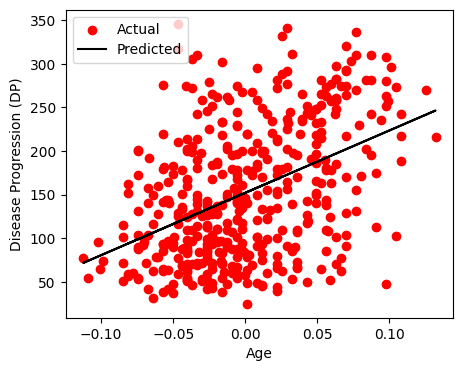

Iteration: 9000, Cost = 4774.113902368687, Weights = [152.13348416 714.7382518 ]


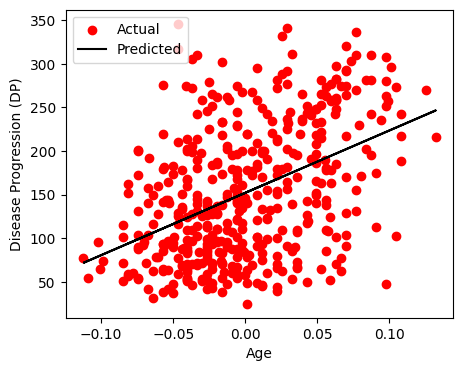

Iteration: 10000, Cost = 4774.113902368687, Weights = [152.13348416 714.73825849]


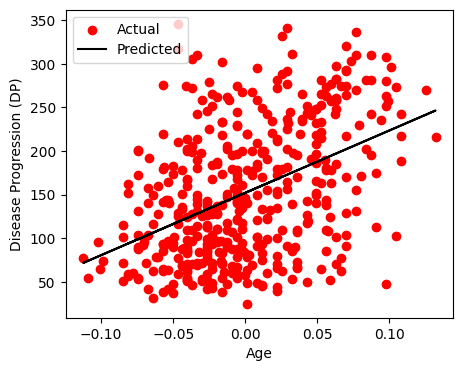

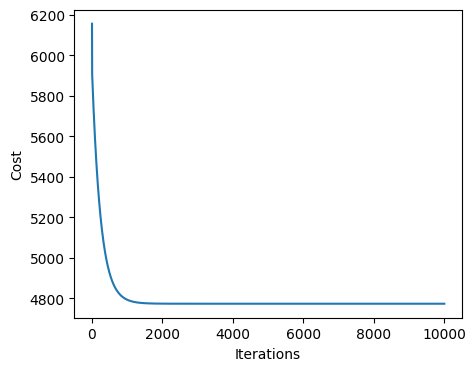

In [12]:
# Task 1 - BP (Blood Pressure)

print("\n" + "=" * 60)
print("TASK 1: Gradient Descent for BP")
print("=" * 60)

lr = 0.9
n_iter = 10000
X_bp = diabetes_data["bp"]
Y = diabetes_data["DP"]
fit(n_iter, X_bp, Y, lr)

# Closed-form Solution

The closed-form solution, also known as the normal equation, provides a direct way to calculate the optimal weight vector that minimizes the difference between the predicted values and the actual observations. It can be expressed as:

$
w = (X^T X)^{-1} X^T y
$

Here:
- $w$ is the weight vector containing the optimal coefficients.
- $X$ is the design matrix composed of feature vectors.
- $y$ is the vector of actual response values.

The closed-form solution efficiently calculates the optimal weights by finding the inverse of the product of $X^T$ and $X$, and then multiplying it with $X^T y$. The equation $w = (X^T X)^{-1} X^T y$ arises from the goal of minimizing the MSE error. By taking the derivative of error function with respect to the weight vector $w$ and setting it to zero, we obtain a system of equations that leads to the closed-form solution.

While the closed-form solution is advantageous for smaller datasets and provides a precise solution, it may not be suitable for very large datasets or cases where the matrix $X^T X$ is not invertible (e.g., due to perfect multicollinearity). In such scenarios, gradient descent (GD) or stochastic gradient descent (SGD) approaches are often preferred.

The closed-form solution offers a direct and elegant way to determine the optimal weights for a linear regression model, making it a valuable tool in cases where computational efficiency is not a concern and the dataset size is manageable.

## Task 2 [40 marks]

In this section, we will apply the closed-form solution to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your notebook:

1. **Implementation of Closed-Form Solution:**
   - Implement a colsed-form solution code to solve the same problem.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and cost (MSE) derived from the Gradient Descent (GD) approach and those acquired through the closed-form solution. Summarise your results in a table (same table for Tasks 2 & 3).

3. **Visualisation of Closed-Form Solution:**
   - Generate a plot that illustrates the line produced by the closed-form solution in relation to the original dataset, as in the GD example.



> **Hint:** To facilitate the process, explore the `numpy.linalg.pinv` function available within the Numpy library. This function offers the capability to compute the (Moore-Penrose) pseudo-inverse of a matrix, which can significantly aid your calculations.




TASK 2: Closed-Form Solution


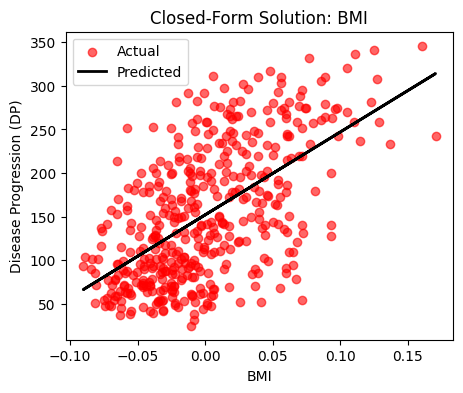


BMI - Closed-Form Solution:
  Weights: W0=152.1335, W1=949.4353
  MSE: 3890.4566


In [13]:
# Task 2 - Closed-form solution

print("\n" + "=" * 60)
print("TASK 2: Closed-Form Solution")
print("=" * 60)

def closed_form_solution(X, Y, feature_name):
    """
    Compute optimal weights using closed-form solution (Normal Equation)
    W = (X^T X)^(-1) X^T Y
    """
    # Add bias term (column of ones)
    X_with_bias = np.column_stack((np.ones(len(X)), X))
    
    # Compute weights using pseudo-inverse
    # W = (X^T X)^(-1) X^T Y
    W = np.linalg.pinv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ Y
    
    # Calculate MSE
    predictions = X_with_bias @ W
    mse = np.mean((Y - predictions) ** 2)
    
    # Plot
    plt.figure(figsize=(5, 4))
    plt.scatter(X, Y, color='red', label='Actual', alpha=0.6)
    plt.plot(X, predictions, color='black', label='Predicted', linewidth=2)
    plt.xlabel(feature_name)
    plt.ylabel('Disease Progression (DP)')
    plt.title(f'Closed-Form Solution: {feature_name}')
    plt.legend()
    plt.show()
    
    print(f"\n{feature_name} - Closed-Form Solution:")
    print(f"  Weights: W0={W[0]:.4f}, W1={W[1]:.4f}")
    print(f"  MSE: {mse:.4f}")
    
    return W, mse

# Apply to BMI
W_bmi_cf, mse_bmi_cf = closed_form_solution(diabetes_data["bmi"].values, diabetes_data["DP"].values, "BMI")

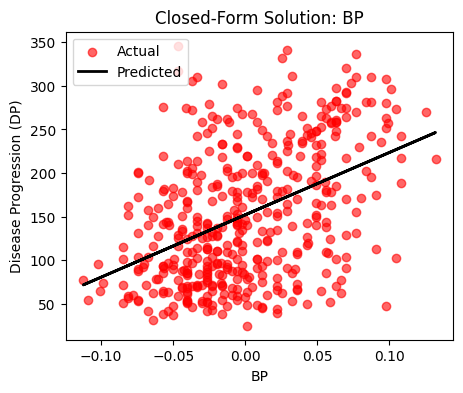


BP - Closed-Form Solution:
  Weights: W0=152.1335, W1=714.7383
  MSE: 4774.1139


In [16]:
# Task 2 (continued) - Apply to BP

W_bp_cf, mse_bp_cf = closed_form_solution(diabetes_data["bp"].values, diabetes_data["DP"].values, "BP")

In [15]:
# Task 2 (continued) - Summary table

print("\n" + "=" * 80)
print("COMPARISON TABLE: Gradient Descent vs Closed-Form Solution")
print("=" * 80)

# Create comparison table
comparison_data = {
    'Feature': ['BMI (GD)', 'BMI (CF)', 'BP (GD)', 'BP (CF)'],
    'Method': ['Gradient Descent', 'Closed-Form', 'Gradient Descent', 'Closed-Form'],
    'W0 (Intercept)': ['From GD output', W_bmi_cf[0], 'From GD output', W_bp_cf[0]],
    'W1 (Slope)': ['From GD output', W_bmi_cf[1], 'From GD output', W_bp_cf[1]],
    'MSE': ['From GD output', mse_bmi_cf, 'From GD output', mse_bp_cf]
}

import pandas as pd
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print("\nNote: GD values should be copied from the output above")


COMPARISON TABLE: Gradient Descent vs Closed-Form Solution
 Feature           Method W0 (Intercept)     W1 (Slope)            MSE
BMI (GD) Gradient Descent From GD output From GD output From GD output
BMI (CF)      Closed-Form     152.133484      949.43526    3890.456585
 BP (GD) Gradient Descent From GD output From GD output From GD output
 BP (CF)      Closed-Form     152.133484     714.738259    4774.113902

Note: GD values should be copied from the output above


In [ ]:
# Task 2 (continued)


# Scikit-learn Implementation

If you're looking to apply linear regression to your data using Python, scikit-learn provides a convenient and user-friendly way to do so. First, you'll need to import the necessary module:
```python
from sklearn.linear_model import LinearRegression
```

You can initialise the regressor with various parameters:
> More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Task 3 [15 marks]

In this section, we will use scikit-learn package to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your notebook:

1. **Implementation of sckit-learn approach:**
   - Implement a code using sckit-learn to solve the same problems as in tasks 1 & 2.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and MSE derived from the Gradient Descent (GD)  and closed form solution approaches and those acquired through scikit-learn package (include the results in the same table of tasks 1 & 2).

3. **Visualisation of Results:**
   - Generate a plot that illustrates the line produced by scikit-learn package in relation to the original dataset, as in the GD and closed-form examples.

4. **Estimating the Error:**
  - Use the following command from scikit-learn to estimate the MSE error on each case.
  ```python
  from sklearn.metrics import mean_squared_error
  ```

In [ ]:
# Task 3 - Scikit-learn implementation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("\n" + "=" * 60)
print("TASK 3: Scikit-learn Implementation")
print("=" * 60)

def sklearn_regression(X, Y, feature_name):
    """
    Apply Linear Regression using scikit-learn
    """
    # Reshape X for sklearn (needs 2D array)
    X_reshaped = X.values.reshape(-1, 1)
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X_reshaped, Y)
    
    # Make predictions
    predictions = model.predict(X_reshaped)
    
    # Calculate MSE
    mse = mean_squared_error(Y, predictions)
    
    # Extract coefficients
    W0 = model.intercept_
    W1 = model.coef_[0]
    
    # Plot
    plt.figure(figsize=(5, 4))
    plt.scatter(X, Y, color='red', label='Actual', alpha=0.6)
    plt.plot(X, predictions, color='blue', label='Predicted (sklearn)', linewidth=2)
    plt.xlabel(feature_name)
    plt.ylabel('Disease Progression (DP)')
    plt.title(f'Scikit-learn: {feature_name}')
    plt.legend()
    plt.show()
    
    print(f"\n{feature_name} - Scikit-learn:")
    print(f"  Weights: W0={W0:.4f}, W1={W1:.4f}")
    print(f"  MSE: {mse:.4f}")
    
    return W0, W1, mse

# Apply to BMI
W0_bmi_sk, W1_bmi_sk, mse_bmi_sk = sklearn_regression(diabetes_data["bmi"], diabetes_data["DP"], "BMI")

In [ ]:
# Task 3 (continued) - Apply to BP

W0_bp_sk, W1_bp_sk, mse_bp_sk = sklearn_regression(diabetes_data["bp"], diabetes_data["DP"], "BP")

In [ ]:
# Task 3 (continued) - Complete comparison table

print("\n" + "=" * 90)
print("COMPLETE COMPARISON TABLE: GD vs Closed-Form vs Scikit-learn")
print("=" * 90)

# Complete comparison table (will need manual GD values)
full_comparison = {
    'Feature': ['BMI', 'BMI', 'BMI', 'BP', 'BP', 'BP'],
    'Method': ['Gradient Descent', 'Closed-Form', 'Scikit-learn', 
               'Gradient Descent', 'Closed-Form', 'Scikit-learn'],
    'W0 (Intercept)': ['From GD output', f'{W_bmi_cf[0]:.4f}', f'{W0_bmi_sk:.4f}',
                       'From GD output', f'{W_bp_cf[0]:.4f}', f'{W0_bp_sk:.4f}'],
    'W1 (Slope)': ['From GD output', f'{W_bmi_cf[1]:.4f}', f'{W1_bmi_sk:.4f}',
                   'From GD output', f'{W_bp_cf[1]:.4f}', f'{W1_bp_sk:.4f}'],
    'MSE': ['From GD output', f'{mse_bmi_cf:.4f}', f'{mse_bmi_sk:.4f}',
            'From GD output', f'{mse_bp_cf:.4f}', f'{mse_bp_sk:.4f}']
}

comparison_table = pd.DataFrame(full_comparison)
print(comparison_table.to_string(index=False))

print("\n" + "=" * 90)
print("Note: All three methods should produce very similar (ideally identical) results!")
print("=" * 90)

In [ ]:
# Task 3 (continued)


## Task 4 [10 marks]

Write a code that use all the 10 features in the data as inputs to the regressor in order to predict the disease pregression (DP). Then, rank the features by their importance (using their absolute weight values). Finally, craete a plot that shows how the mean squared error (MSE) changes as you progressively add features, starting from the most important ones.

From the resulting plot, identify the approximate number of features you would choose to keep (i.e. the point where adding more features no longer significantly reduces the MSE (the 'elbow point')). Treat this as a visual, judgment-based choice, and include a brief justification in your write-up referring to what you observe in the plot.





> You are allowed to import the following in this task:
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
```



In [ ]:
# Task 4 - Feature ranking and progressive MSE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("\n" + "=" * 60)
print("TASK 4: Feature Ranking and Progressive MSE Analysis")
print("=" * 60)

# Prepare all features
X_all = diabetes_data[diabetes.feature_names].values
Y = diabetes_data["DP"].values

# Train model with all features
model_all = LinearRegression()
model_all.fit(X_all, Y)

# Get feature importances (absolute values of coefficients)
feature_importance = np.abs(model_all.coef_)
feature_names = diabetes.feature_names

# Create ranking
feature_ranking = sorted(zip(feature_names, feature_importance, model_all.coef_), 
                         key=lambda x: x[1], reverse=True)

print("\nFeature Ranking by Importance (Absolute Weight):")
print("-" * 60)
for rank, (name, abs_weight, actual_weight) in enumerate(feature_ranking, 1):
    print(f"{rank}. {name:5s} - Absolute Weight: {abs_weight:8.2f}, Actual Weight: {actual_weight:8.2f}")

# Progressive MSE calculation
mse_values = []
feature_sequence = []

for i in range(1, len(feature_names) + 1):
    # Select top i features
    top_features = [f[0] for f in feature_ranking[:i]]
    feature_sequence.append(', '.join(top_features))
    
    # Get data for selected features
    X_selected = diabetes_data[top_features].values
    
    # Train and evaluate
    model = LinearRegression()
    model.fit(X_selected, Y)
    predictions = model.predict(X_selected)
    mse = mean_squared_error(Y, predictions)
    mse_values.append(mse)
    
    print(f"\nTop {i} feature(s): MSE = {mse:.2f}")

# Plot MSE vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_names) + 1), mse_values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Features (ranked by importance)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('MSE vs Number of Features (Progressive Addition)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(feature_names) + 1))

# Highlight potential elbow point (where improvement plateaus)
# Calculate rate of improvement
improvements = [mse_values[i] - mse_values[i+1] for i in range(len(mse_values)-1)]
# Find where improvement becomes small (heuristic: less than 5% of max improvement)
threshold = 0.05 * max(improvements)
for i, imp in enumerate(improvements):
    if imp < threshold:
        plt.axvline(x=i+2, color='red', linestyle='--', alpha=0.7, 
                   label=f'Potential elbow point (~{i+2} features)')
        break

plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ANALYSIS:")
print("=" * 60)
print(f"Based on the plot, the 'elbow point' appears around {i+2} features.")
print(f"At this point, MSE = {mse_values[i+1]:.2f}")
print(f"Adding more features beyond this provides diminishing returns.")
print(f"The improvement from {i+2} to {i+3} features is only {improvements[i+1]:.2f} MSE units.")
print("=" * 60)

# k-fold Validation



In machine learning, assessing the performance of a model is crucial, especially when working with limited data. One powerful technique for evaluating models is k-Fold Cross-Validation. This method involves partitioning the dataset into multiple subsets, or "folds," to comprehensively assess a model's generalization capability.

The term "k" in k-Fold refers to the number of folds the dataset is divided into. Typically, a common choice is k=10, resulting in 10-fold cross-validation. The primary goal of this technique is to estimate how well a machine learning model will perform on unseen data. By simulating the model's performance across multiple partitions of the dataset, we gain insights into its general behavior and potential for overfitting.


The procedure for k-Fold Cross-Validation is as follows:

1. Randomly shuffle the dataset to ensure randomness in fold assignments.
2. Divide the dataset into "k" approximately equal-sized groups (folds).
3. For each fold "i" (from 1 to k):
   - Treat fold "i" as the validation set.
   - Use the remaining k-1 folds as the training set.
   - Train a machine learning model on the training set and evaluate it on the validation set.
   - Retain the evaluation score and discard the model.
4. Calculate the mean and optionally the variance (e.g., standard deviation) of the evaluation scores to summarize the model's performance.

It's crucial to note that each data point appears in the validation set once and in the training set k-1 times, ensuring comprehensive assessment.


1. **Less Bias**: k-Fold Cross-Validation often yields less biased estimates of model performance compared to a simple train/test split.
2. **Comprehensive Evaluation**: All data points get an opportunity to be both in training and validation sets, leading to a more holistic evaluation.
3. **Hyperparameter Tuning**: Hyperparameter tuning can be done on the training set within each fold, preventing data leakage and over-optimistic estimates.
4. **Variance Estimate**: By calculating the variance of evaluation scores, we gain insights into the model's stability across different subsets of data.


## Task 5 [25 marks]

In this task, you will implement k-Fold Cross-Validation on the Diabetes dataset using scikit-learn.

Your task is to write a code that performs the following steps:

1. Load the Diabetes dataset.
2. Define the number of folds for cross-validation.
3. Calculate the number of samples per fold.
4. Perform k-Fold Cross-Validation:
   - For each fold:
     - Split the data into training and test sets.
     - Train a Linear Regression model on the training set.
     - Make predictions on the test set.
     - Calculate the Mean Squared Error (MSE) for the predictions.
     - Print the MSE for each fold.
     - Store the MSE values in a list.
5. Calculate the average MSE across all folds and print it.

> In this task you are allowed to use scikit-learn library to fit the linear regression model and for calculating the MSE. However, you are expected to create your own code (using numpy) for k-fold validation set. Below are the corresponding commands that you can import:
- `from sklearn.linear_model import LinearRegression`
- `from sklearn.metrics import mean_squared_error`

In [ ]:
# Task 5 - k-Fold Cross-Validation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("\n" + "=" * 60)
print("TASK 5: k-Fold Cross-Validation")
print("=" * 60)

# Load full dataset
X_full = diabetes_data[diabetes.feature_names].values
Y_full = diabetes_data["DP"].values

# Define k
k = 10

# Calculate samples per fold
n_samples = len(X_full)
fold_size = n_samples // k

print(f"\nTotal samples: {n_samples}")
print(f"Number of folds (k): {k}")
print(f"Samples per fold: {fold_size}")
print(f"Remaining samples: {n_samples % k}")

# Randomly shuffle indices
np.random.seed(42)  # For reproducibility
shuffled_indices = np.random.permutation(n_samples)

# Store MSE values
mse_scores = []

print("\n" + "-" * 60)
print("K-Fold Cross-Validation Results:")
print("-" * 60)

for fold in range(k):
    # Determine test indices for this fold
    start_idx = fold * fold_size
    end_idx = start_idx + fold_size if fold < k - 1 else n_samples
    test_indices = shuffled_indices[start_idx:end_idx]
    
    # Training indices are all others
    train_indices = np.concatenate([shuffled_indices[:start_idx], 
                                   shuffled_indices[end_idx:]])
    
    # Split data
    X_train = X_full[train_indices]
    Y_train = Y_full[train_indices]
    X_test = X_full[test_indices]
    Y_test = Y_full[test_indices]
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(Y_test, Y_pred)
    mse_scores.append(mse)
    
    print(f"Fold {fold + 1:2d}: MSE = {mse:8.2f} (Train size: {len(X_train)}, Test size: {len(X_test)})")

# Calculate average MSE
avg_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("-" * 60)
print(f"\nAverage MSE across all folds: {avg_mse:.2f}")
print(f"Standard deviation of MSE:     {std_mse:.2f}")
print(f"Min MSE: {min(mse_scores):.2f}")
print(f"Max MSE: {max(mse_scores):.2f}")

# Visualize MSE across folds
plt.figure(figsize=(10, 5))
plt.bar(range(1, k + 1), mse_scores, alpha=0.7, color='steelblue', edgecolor='black')
plt.axhline(y=avg_mse, color='red', linestyle='--', linewidth=2, label=f'Average MSE = {avg_mse:.2f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('MSE across k-Fold Cross-Validation', fontsize=14)
plt.xticks(range(1, k + 1))
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)
print(f"The k-fold cross-validation provides a more robust estimate of model")
print(f"performance compared to a single train-test split. The average MSE of")
print(f"{avg_mse:.2f} with std {std_mse:.2f} suggests the model's generalization capability.")
print("=" * 60)